# Binary classification project- Intro to ML

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
from sklearn import preprocessing
import xgboost as xgb
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix,accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('train.csv')

# Data Exploration & Munging 

We will first look at the data and get some informations and basic statistics

In [181]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,label
0,1.170981,5.672133,0.6,80.0,76.0,D,a21,1.107143,0.692857,5,0.702957,1024.1,1025.9,0,0.6mm,32.0,13.9,12.2,D,D,28.0,7.0,2011,40.0,15.420787,1
1,2.595788,23.203289,6.4,43.0,64.0,N,a9,1.700000,0.614286,11,0.223911,1005.3,1008.1,0,0.0mm,50.0,18.6,16.5,N,I,61.0,43.0,2012,110.0,240.496883,0
2,0.972794,7.127348,0.4,63.0,100.0,C,a4,1.242857,0.428571,6,0.180848,1020.8,1026.5,0,0.0mm,NaN,16.5,9.6,M,NaN,15.0,7.0,2012,0.0,224.282903,0
3,1.891667,17.881507,4.2,65.0,71.0,K,a15,1.050000,0.671429,10,0.181289,1021.9,1019.8,0,0.8mm,88.0,14.2,11.4,K,D,39.0,24.0,2010,130.0,86.810830,0
4,1.965881,13.936969,3.2,40.0,62.0,F,a1,1.950000,1.085714,3,0.237347,1005.3,1007.8,0,0.0mm,112.0,26.6,23.4,C,NaN,30.0,20.0,2011,0.0,120.642922,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22161 non-null  float64
 1   1       22161 non-null  float64
 2   2       22161 non-null  float64
 3   3       22102 non-null  float64
 4   4       22057 non-null  float64
 5   5       20812 non-null  object 
 6   6       22161 non-null  object 
 7   7       22154 non-null  float64
 8   8       22143 non-null  float64
 9   9       22161 non-null  int64  
 10  10      22161 non-null  float64
 11  11      22055 non-null  float64
 12  12      22048 non-null  float64
 13  13      22161 non-null  object 
 14  14      22161 non-null  object 
 15  15      20290 non-null  float64
 16  16      22133 non-null  float64
 17  17      22109 non-null  float64
 18  18      21951 non-null  object 
 19  19      21141 non-null  object 
 20  20      20816 non-null  float64
 21  21      22062 non-null  float64
 22

In [183]:
df.describe()

,0,1,2,3,4,7,8,9,10,11,12,15,16,17,20,21,22,23,24,label
count,22161.000000,22161.000000,22161.000000,22102.000000,22057.000000,22154.000000,22143.000000,22161.000000,22161.000000,22055.000000,22048.000000,20290.000000,22133.000000,22109.000000,20816.000000,22062.000000,22161.000000,22061.000000,22061.000000,22161.000000
mean,2.185958,19.797754,4.929620,51.547009,68.497982,1.648476,0.888041,6.429358,0.228284,1015.347014,1017.708572,73.685017,21.617133,17.065837,39.995484,19.101577,2010.945264,146.971579,224.835441,0.236451
std,0.815080,10.763614,3.572644,20.184353,18.231315,0.480275,0.461375,3.381488,0.161565,7.011856,7.085807,37.866780,6.602743,6.409174,13.150807,8.546933,0.823740,86.609704,160.801099,0.424912
min,-0.490607,2.437300,0.000000,1.000000,3.000000,0.450000,-0.492857,1.000000,-0.195661,984.500000,983.700000,0.000000,3.900000,-0.700000,11.000000,0.000000,2010.000000,0.000000,0.001355,0.000000
25%,1.622068,12.268371,2.400000,37.000000,57.000000,1.271429,0.542857,3.000000,0.136002,1010.600000,1013.000000,45.000000,16.500000,12.100000,31.000000,13.000000,2010.000000,90.000000,100.144819,0.000000
50%,2.167701,17.833216,4.200000,52.000000,69.000000,1.607143,0.864286,7.000000,0.206457,1015.300000,1017.700000,82.000000,21.000000,16.600000,39.000000,19.000000,2011.000000,130.000000,199.866581,0.000000
75%,2.720341,25.196446,6.600000,65.000000,82.000000,2.007143,1.242857,9.000000,0.278929,1020.000000,1022.400000,104.000000,26.400000,21.800000,48.000000,24.000000,2012.000000,200.000000,316.118054,0.000000
max,9.092011,248.877854,81.200000,100.000000,100.000000,3.435714,2.128571,12.000000,0.954076,1038.900000,1040.900000,143.000000,46.100000,36.900000,135.000000,69.000000,2012.000000,670.000000,1426.459838,1.000000


* We can already see that we have some categorial feature - we will check if they are ordinal and should be treated as 'labels' or to be one hot encoded.
* we will have to clean column 14 (remove the mm) and convert it to float and maybe also clean column number 6
* we can also see that column number 13 gets 0 or 1 - we will convert it to int

In [184]:
# Removing the mm from column 14
for idx, row in df.iterrows():
    df.iloc[idx,14] = row[14][:-2]

# let's convert this column to floats
df['14'] = df['14'].astype(float)

In [185]:
df['13'].value_counts(normalize=True)

0          0.762872
1          0.233473
unknown    0.003655
Name: 13, dtype: float64

In [186]:
#Let' remove the 'unkwown' values and replace them with nan
df.loc[df['13']=='unknown','13'] = np.nan
# now let's convert it to floats
df['13'] = df['13'].astype(float)

In [187]:
# we will chekk the ratio of nulls in each column (feature)
df.isnull().sum() /df.shape[0]

0        0.000000
1        0.000000
2        0.000000
3        0.002662
4        0.004693
5        0.060873
6        0.000000
7        0.000316
8        0.000812
9        0.000000
10       0.000000
11       0.004783
12       0.005099
13       0.003655
14       0.003655
15       0.084428
16       0.001263
17       0.002346
18       0.009476
19       0.046027
20       0.060692
21       0.004467
22       0.000000
23       0.004512
24       0.004512
label    0.000000
dtype: float64

* we might cosider deleting featute 15 since 8% of the data for this feature is missing. we will check how important it is later. 

In [8]:
df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5         object
6         object
7        float64
8        float64
9          int64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18        object
19        object
20       float64
21       float64
22         int64
23       float64
24       float64
label      int64
dtype: object

## Let's observe our categorical features

In [435]:
df['6'].value_counts().sort_index()

a0     768
a1     768
a10    280
a11    767
a12    771
a13    661
a14    753
a15    778
a16    753
a17    766
a18    780
a19    762
a2     719
a20    755
a21    550
a22    773
a23    750
a24    691
a25    770
a26    756
a27    762
a28    779
a29    779
a3     769
a30    762
a4     417
a5     764
a6     786
a7     785
a8     503
a9     684
Name: 6, dtype: int64

If we omit the 'a' from value in feature '6', we can see theat we will get number from 0 to 30. we'd want to check if this range has an oridal relation

In [188]:
df_copy = df.copy()
for idx, row in df_copy.iterrows():
    df_copy.iloc[idx,6] = row[6][1:]
    
df_copy['6'] = df_copy['6'].astype(float)

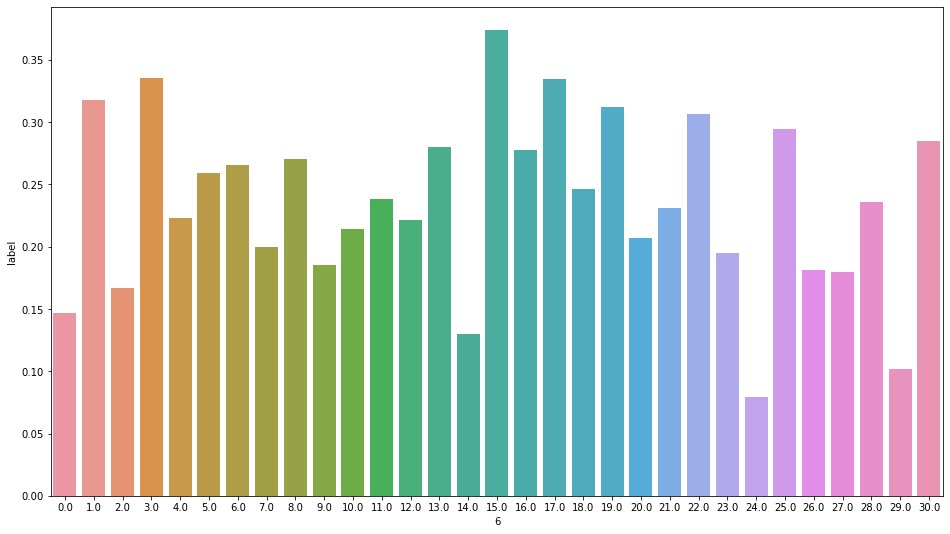

In [189]:
# Grouping feature '6' values and conduct mean will let us see if there's a trend by seeing the average of the target the ordered values. 
df_grouped = df_copy.groupby('6')['label'].mean().reset_index()
plt.rcParams["figure.figsize"] = [16,9]
sns.barplot(x = '6',y='label', data=df_grouped)

By this plot, it seems like there's no linear trend. Thus, we will leave this feature to be categorical and we perform one-hot encoding to it.


We will do the same for feature '5'. in this feature, the values are the letters A to P. we will look for ordinal relation

In [190]:
df['5'].value_counts().sort_index()

A    1097
B    1432
C    1330
D    1604
E    1558
F    1575
G     952
H    1010
I    1485
J     910
K    1469
L    1337
M    1239
N    1098
O    1241
P    1475
Name: 5, dtype: int64

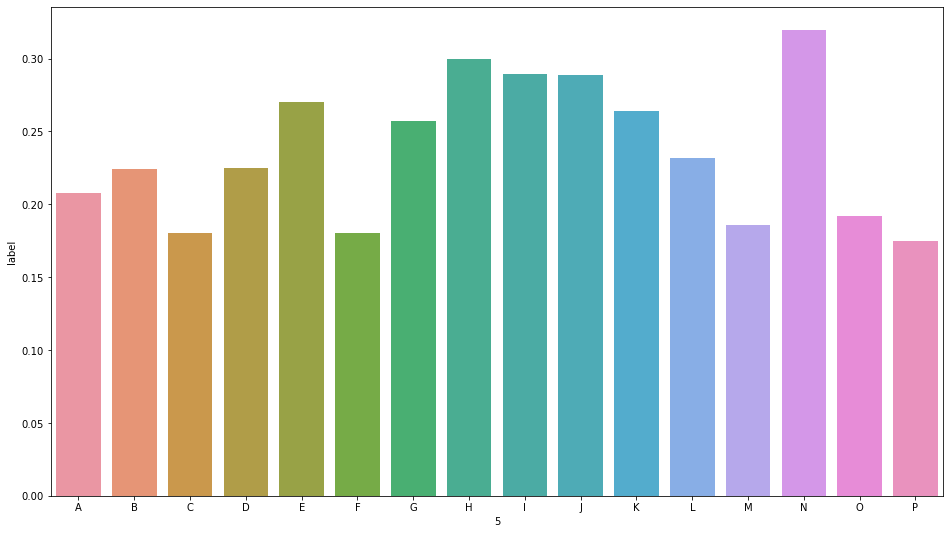

In [191]:
df5 = df.groupby('5')['label'].mean().reset_index()
sns.barplot(x='5',y='label',data=df5)

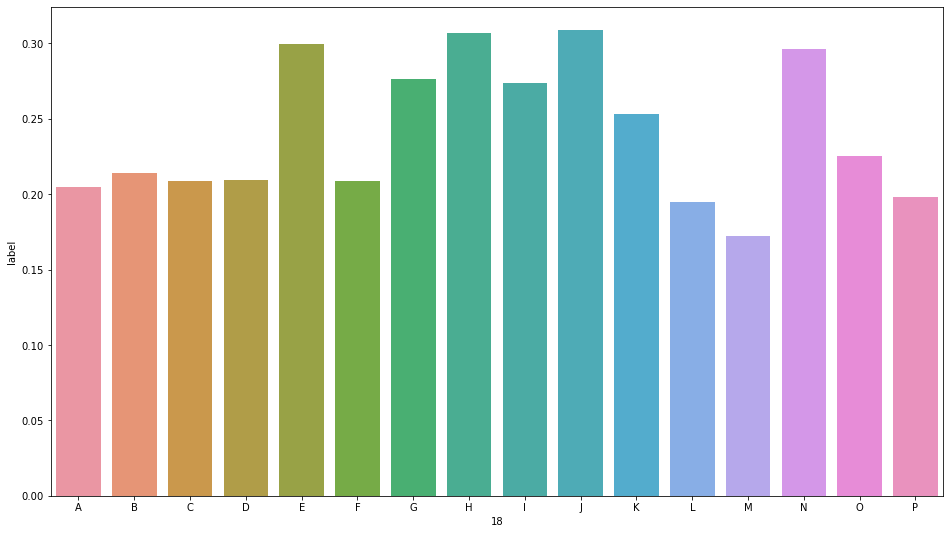

In [192]:
df18 = df.groupby('18')['label'].mean().reset_index()
sns.barplot(x='18',y='label',data=df18)

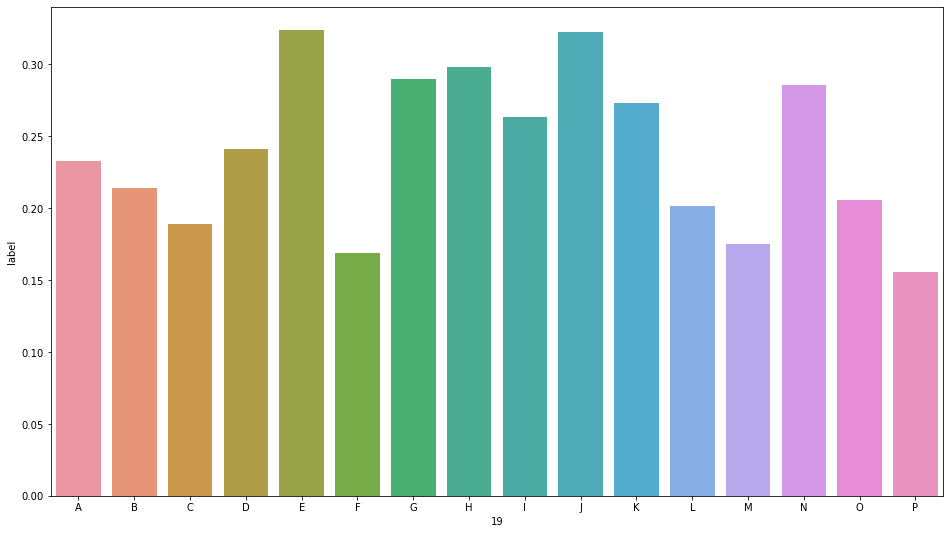

In [193]:
df19 = df.groupby('19')['label'].mean().reset_index()
sns.barplot(x='19',y='label',data=df19)

## As it seems, none of the categorial feature shows ordinal connection. we will perform one hot encoding to them rather than use labels (that can confuse with their numeric order)

Now we will look at the correlation plot. We will look for correlated features that will be redundent to use and will observe the correlation of each feature with the label

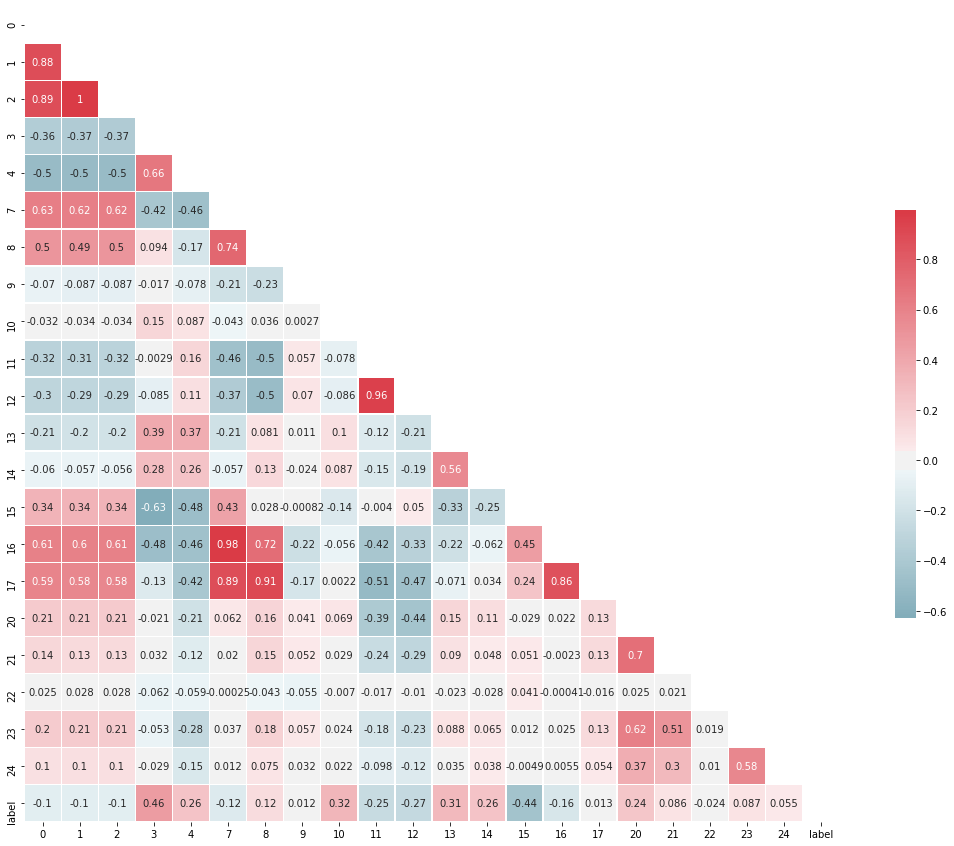

In [194]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Some features are perfectly/ highly correlated. We will omit some of them later

In [195]:
# we checked for redundent duplicate rows in the data. 
# seems like we dont have any
df[df.duplicated()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,label


## We'd want to get to know our features better- to see how they distribute, if they are skewed and if there are outliers that we might want to ignore. we will plot boxplots and histograms for the numerical features

In [197]:
#get list of numerical columns
no_string_columns = []
for col in range(0,len(df.columns)):
    if(type(df.iloc[0,col])!=str):
        no_string_columns.append(col)

In [198]:
df.iloc[:,no_string_columns].head()

,0,1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,label
0,1.170981,5.672133,0.6,80.0,76.0,1.107143,0.692857,5,0.702957,1024.1,1025.9,0.0,0.6,32.0,13.9,12.2,28.0,7.0,2011,40.0,15.420787,1
1,2.595788,23.203289,6.4,43.0,64.0,1.700000,0.614286,11,0.223911,1005.3,1008.1,0.0,0.0,50.0,18.6,16.5,61.0,43.0,2012,110.0,240.496883,0
2,0.972794,7.127348,0.4,63.0,100.0,1.242857,0.428571,6,0.180848,1020.8,1026.5,0.0,0.0,NaN,16.5,9.6,15.0,7.0,2012,0.0,224.282903,0
3,1.891667,17.881507,4.2,65.0,71.0,1.050000,0.671429,10,0.181289,1021.9,1019.8,0.0,0.8,88.0,14.2,11.4,39.0,24.0,2010,130.0,86.810830,0
4,1.965881,13.936969,3.2,40.0,62.0,1.950000,1.085714,3,0.237347,1005.3,1007.8,0.0,0.0,112.0,26.6,23.4,30.0,20.0,2011,0.0,120.642922,0


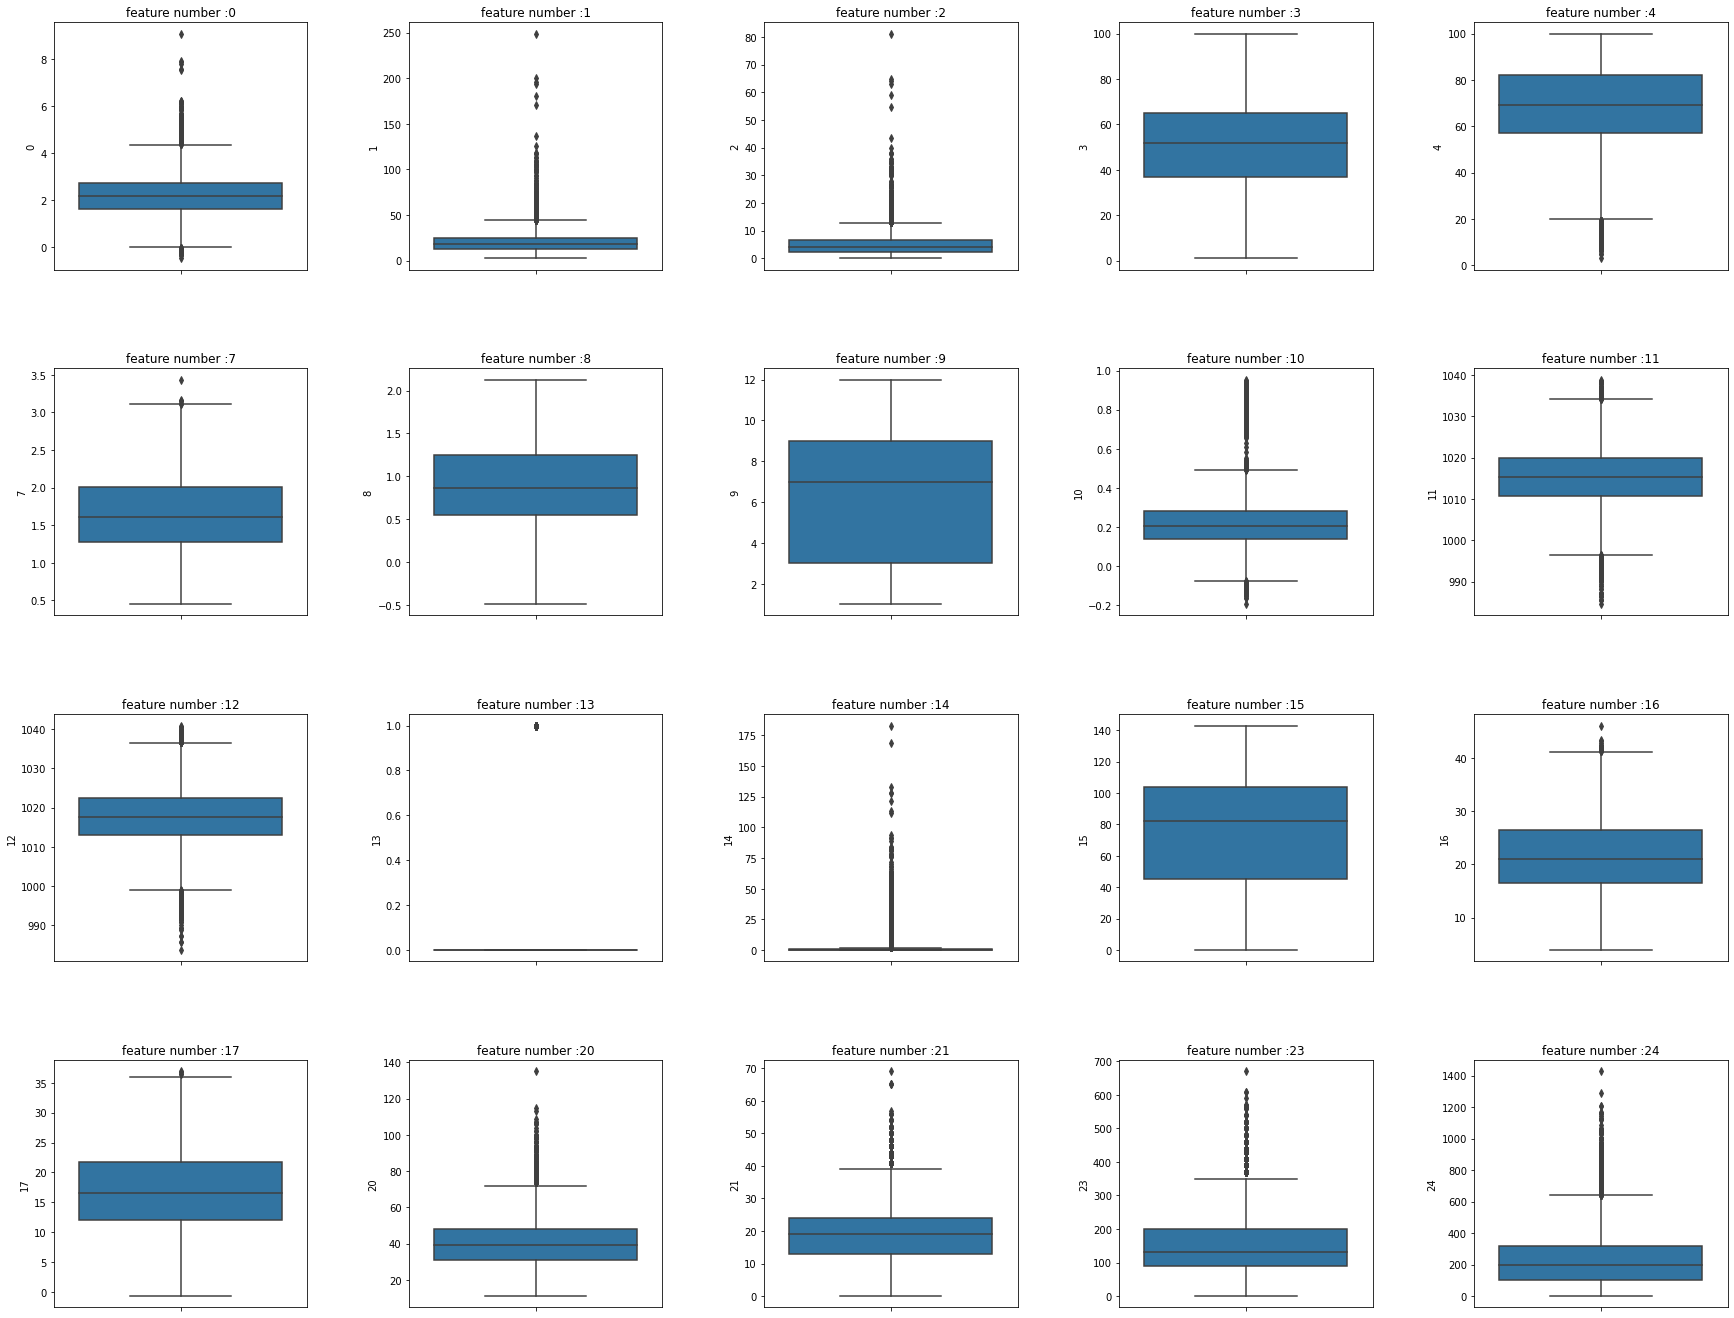

In [199]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plot_num=1
for feature in df.iloc[:,no_string_columns].columns:
    if((feature=='22') | (feature=='label')): # in the list of feature- 22 and 19 are the year and the label (we're not intrested in their boxplot)
        continue
    ax = fig.add_subplot(5,5,plot_num)
    plot_num+=1
    feature = int(feature)
    sns.boxplot(df.iloc[:,feature],orient='v')
    ax.set(title = 'feature number :' + (df.columns[feature]))

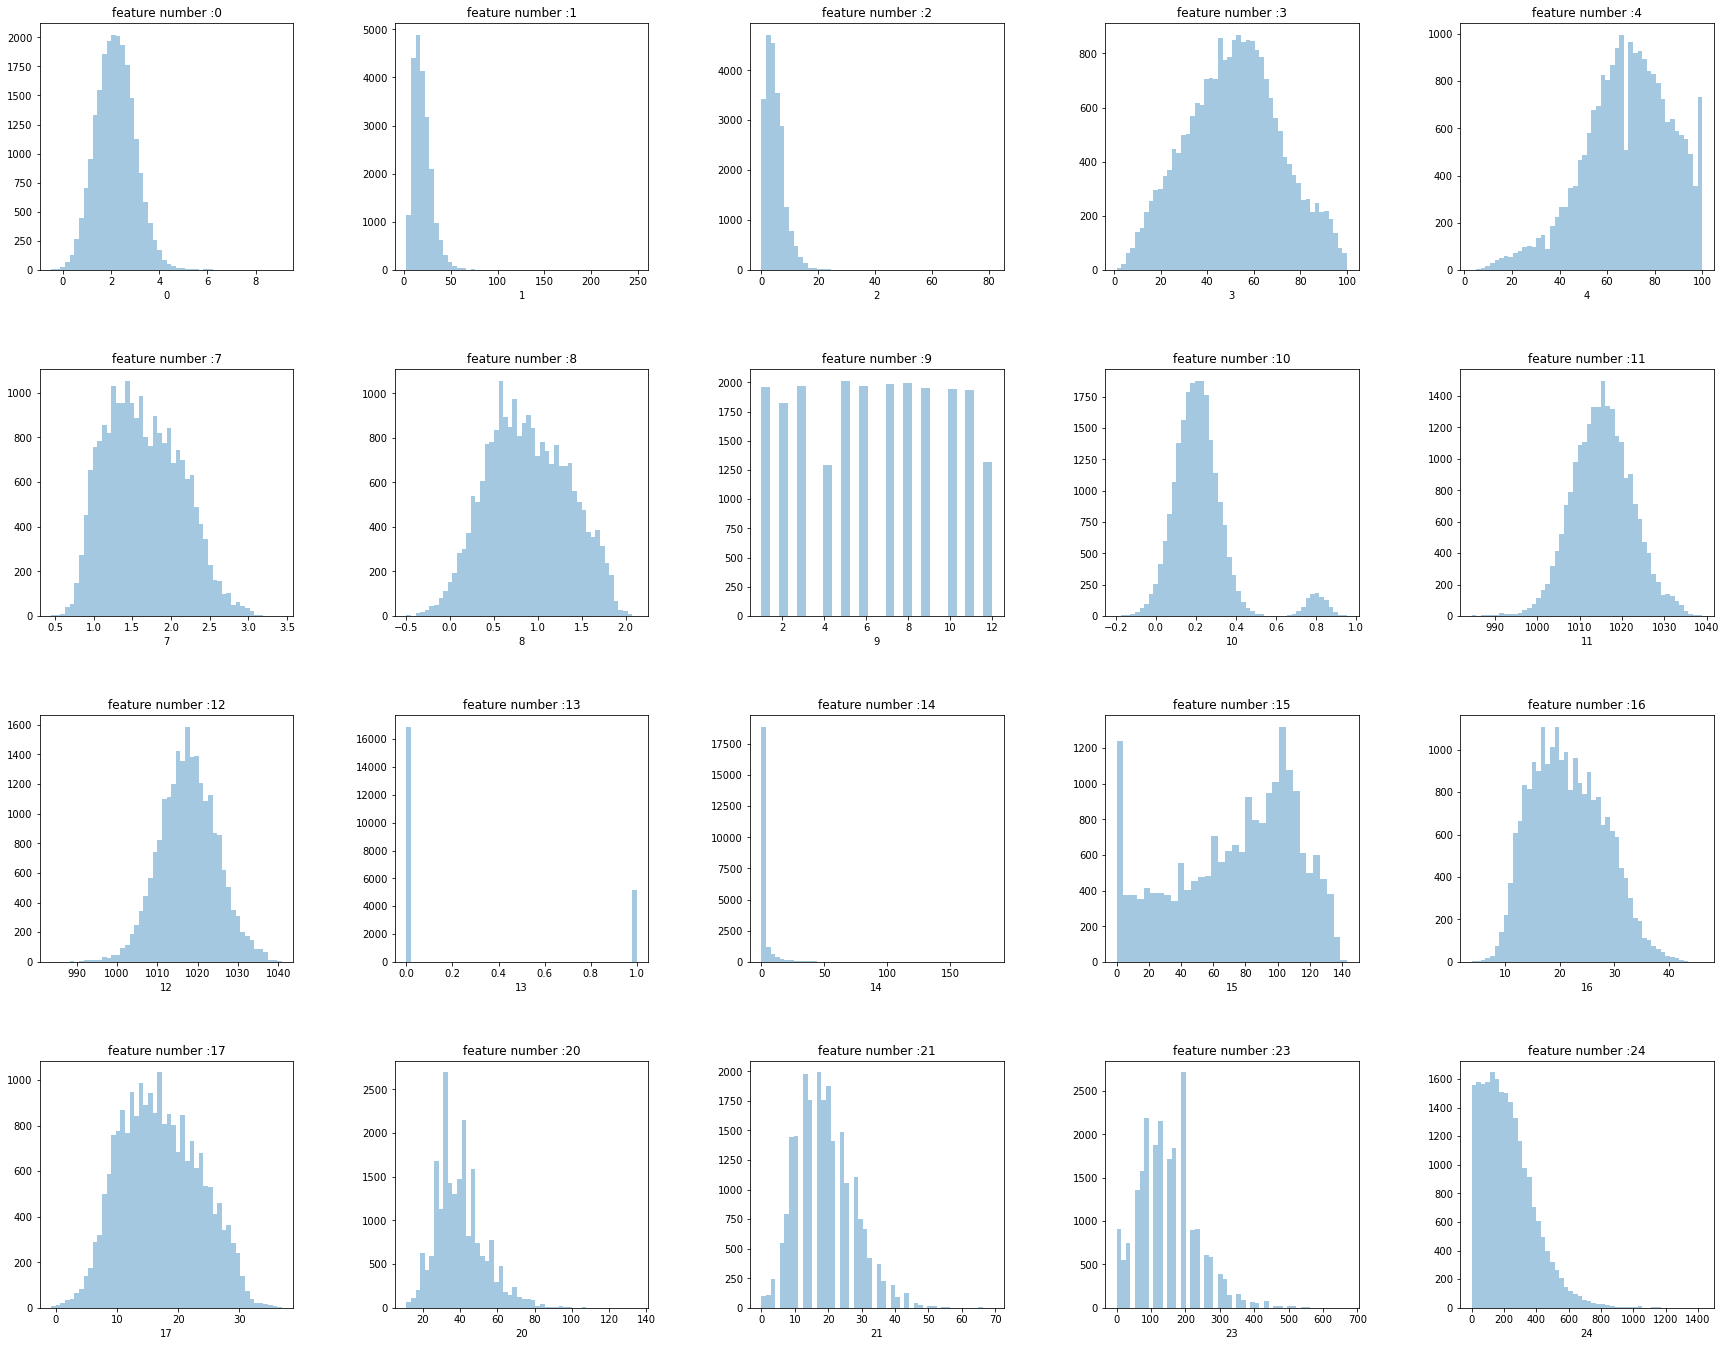

In [200]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plot_num=1
for feature in df.iloc[:,no_string_columns].columns:
    if((feature=='22') | (feature=='label')): # in the list of feature- 16 and 19 are the year and label (we're not intrested in their boxplot)
        continue
    ax = fig.add_subplot(5,5,plot_num)
    plot_num+=1
    feature = int(feature)
    sns.distplot(df.iloc[:,feature],kde=False)
    ax.set(title = 'feature number :' + (df.columns[feature]))

## The boxplot might have given us the idea that we have many outliers but in the histograms we see that many of the futures are skewed

# Feature creation, selection and dimensionality reduction

## We can clearly see the feature 10 is a bimodal (it has two modes). We'd want to distingush between those 2 centers so we will add a binary features that classifies each sample by each group (center)

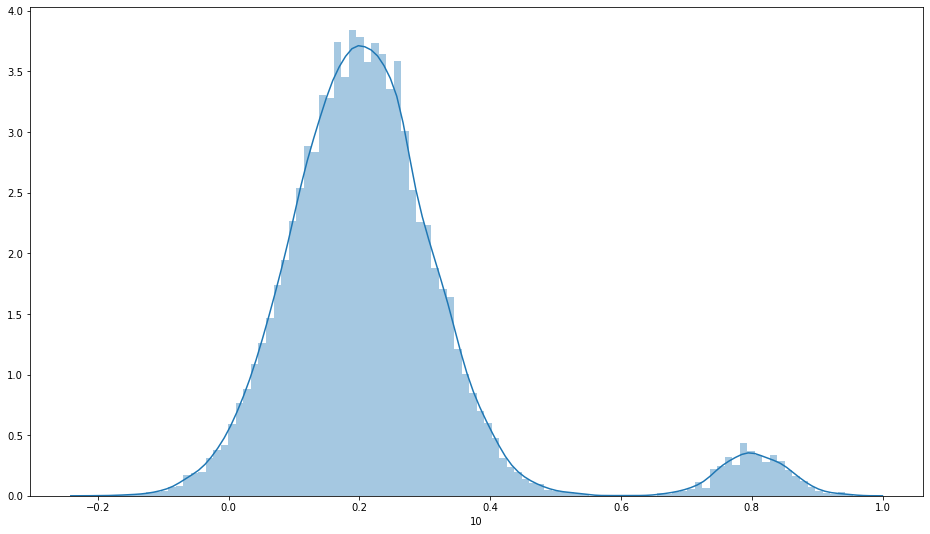

In [201]:
sns.distplot(df.loc[:,'10'], bins=100)

We get to mode that are centered by two means. we will use kmean in order to clasify the data to those two centers

In [202]:
# we can clearly see in the plot that the number of mean should be 2 
k_means = KMeans(2)
k_means.fit(df.loc[:,'10'].to_numpy().reshape(-1,1))
k_means.cluster_centers_

array([[0.19926957],
       [0.79352485]])

## We will create a new feature that classifies each row to one of the two centers

In [203]:
df['10_binary'] = k_means.predict(df.loc[:,'10'].to_numpy().reshape(-1,1))
#we want to keep the label column last (just for our conveniece)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# After running some tests, we discovered that dropping feature 10 gives better results ('10_binary holds enough information and highly correlated with feature '10)
df = df.drop(columns=['10'])


In [204]:
# from the plots, we clearly see that feature number 9 is numerical but doesn't look continues. let check it's value counts
df.loc[:,'9'].value_counts().sort_index() # seems like a 'Month' column (discrete values from 1 to 12)

1     1963
2     1828
3     1966
4     1295
5     2016
6     1974
7     1987
8     1992
9     1949
10    1943
11    1932
12    1316
Name: 9, dtype: int64

We can see that feature number 9 descrete so we might treat it as a categorial feature. Also, in the correlation plot we see that there is no correlation with the label.Thus, we will treat it as a categorial feature

we can also see from the histogram and from the correlation heat map, that some feature are highly correlated and are distributed the same.
therefore, we can omit those identical features since they won't provide us new information.
those identical features are
* 0 & 1 & 2 # while 1&2 have perfect corr (of 1)
* 7 & 16
* 11 & 12
* 8 & 17

## Droping correlated features

In [205]:
# we aren't dropping features '11'/'12' since we got better results by leaving both of them
df = df.drop(columns=['1'])
df = df.drop(columns=['17'])
df = df.drop(columns=['0'])
df = df.drop(columns=['16'])

In [206]:
# We will perform one hot encoding for the categorical features
one_hot = pd.get_dummies(df['5'])
df = df.join(one_hot.add_suffix('_F5'))
one_hot = pd.get_dummies(df['6'])
df = df.join(one_hot.add_suffix('_F6'))
one_hot = pd.get_dummies(df['18'])
df = df.join(one_hot.add_suffix('_F18'))
one_hot = pd.get_dummies(df['19'])
df = df.join(one_hot.add_suffix('_F19'))
one_hot = pd.get_dummies(df['22'])
df = df.join(one_hot)
one_hot = pd.get_dummies(df['9'])
df = df.join(one_hot.add_suffix('_Month'))
df = df.drop(columns=['5','6','18','19','22','9'])

## We will check the nulls ratio for all the features

In [3]:
# We can see that features '15' and '20' have many nulls ~8.5 and 6 %. though, we wouldnt want to drop them because with see that they are 
# highly correlated with the Label (in the correlation heat map)
df.isnull().sum() /df.shape[0]

0        0.000000
1        0.000000
2        0.000000
3        0.002662
4        0.004693
5        0.060873
6        0.000000
7        0.000316
8        0.000812
9        0.000000
10       0.000000
11       0.004783
12       0.005099
13       0.000000
14       0.000000
15       0.084428
16       0.001263
17       0.002346
18       0.009476
19       0.046027
20       0.060692
21       0.004467
22       0.000000
23       0.004512
24       0.004512
label    0.000000
dtype: float64

By the way that feature '15' distributes, it seems like it would be a mistake to remove outlier (there are many values in the very left edge- the values zero)
We will just fill up the missing values by using the mean of the feature

In [208]:
df['15'] = df['15'].fillna(df['15'].mean())

In feature '20' we will clean outliers (the 3rd and 97th quantiles) and we will fill up the missing values with the mean

In [209]:
q= df['20'].quantile(0.03)
q2 = df['20'].quantile(0.97)
df = df[(df['20']>q)&(df['20']<q2)]
df['20'] = df['20'].fillna(df['20'].mean())

The number of missing values that is left now is very small. we won't fill up the missing values. what we will do is just droping
the rows with the missing values (since it gave better results)

## Dimentinality reduction using PCA. We want to reduct the dimention of the group of sparse features (the one hot encoded ones) 

In [210]:
df.columns[15:]

Index([   'label',     'A_F5',     'B_F5',     'C_F5',     'D_F5',     'E_F5',
           'F_F5',     'G_F5',     'H_F5',     'I_F5',     'J_F5',     'K_F5',
           'L_F5',     'M_F5',     'N_F5',     'O_F5',     'P_F5',    'a0_F6',
          'a1_F6',   'a10_F6',   'a11_F6',   'a12_F6',   'a13_F6',   'a14_F6',
         'a15_F6',   'a16_F6',   'a17_F6',   'a18_F6',   'a19_F6',    'a2_F6',
         'a20_F6',   'a21_F6',   'a22_F6',   'a23_F6',   'a24_F6',   'a25_F6',
         'a26_F6',   'a27_F6',   'a28_F6',   'a29_F6',    'a3_F6',   'a30_F6',
          'a4_F6',    'a5_F6',    'a6_F6',    'a7_F6',    'a8_F6',    'a9_F6',
          'A_F18',    'B_F18',    'C_F18',    'D_F18',    'E_F18',    'F_F18',
          'G_F18',    'H_F18',    'I_F18',    'J_F18',    'K_F18',    'L_F18',
          'M_F18',    'N_F18',    'O_F18',    'P_F18',    'A_F19',    'B_F19',
          'C_F19',    'D_F19',    'E_F19',    'F_F19',    'G_F19',    'H_F19',
          'I_F19',    'J_F19',    'K_F19',    'L_F19

In [211]:
# we will try to reduce the 36 matrix of sparse feature to 15 components (we tried different numbers of components)
pca = PCA(n_components=15)
df_sparse_features = df[df.columns[16:]]
df_sparse_features = pd.DataFrame(pca.fit_transform(df_sparse_features))
df_sparse_features = df_sparse_features.add_suffix('_pca')
# join the components to the numerical features (and the label)
df_pca = df[df.columns[:16]]
df_pca = df_pca.join(df_sparse_features)

In [212]:
df_pca.head(3)

,10_binary,2,3,4,7,8,11,12,13,14,15,20,21,23,24,label,0_pca,1_pca,2_pca,3_pca,4_pca,5_pca,6_pca,7_pca,8_pca,9_pca,10_pca,11_pca,12_pca,13_pca,14_pca
0,1,0.6,80.0,76.0,1.107143,0.692857,1024.1,1025.9,0.0,0.6,32.0,28.0,7.0,40.0,15.420787,1,-0.449960,-0.676932,-0.358179,0.808269,-0.238374,-0.478220,0.790094,0.147134,-0.433307,-0.120838,0.195316,0.029825,-0.397723,0.527927,-0.133304
1,0,6.4,43.0,64.0,1.700000,0.614286,1005.3,1008.1,0.0,0.0,50.0,61.0,43.0,110.0,240.496883,0,-0.435826,0.728481,-0.277953,-0.041164,-0.250448,0.367522,-0.340607,-0.257784,-0.332564,-0.621169,-0.434589,0.156341,0.296310,-0.207144,-0.009309
3,0,4.2,65.0,71.0,1.050000,0.671429,1021.9,1019.8,0.0,0.8,88.0,39.0,24.0,130.0,86.810830,0,-0.448587,-0.716494,0.362109,-0.344205,-0.389856,-0.229876,-0.034787,0.307349,-0.225505,0.768767,-0.487082,0.043421,0.024839,0.164057,-0.070336


## DataFrame with PCA

We will perform scaling to numerical features 

In [213]:
list_of_columns = list(df_pca.columns[:15])
scaler = StandardScaler()
features_to_scale= df_pca[list_of_columns]
scaler.fit(features_to_scale)
features_to_scale=pd.DataFrame(scaler.transform(features_to_scale),index=df_pca.index)
# X = X.dropna()
rest_of_cols = df_pca[df_pca.columns[15:]]
df_pca = features_to_scale.join(rest_of_cols)
df_pca = df_pca.dropna()

## DataFrame (without PCA)

We will perform scaling to the the dataframe without pca (and we will see what performs better)

In [214]:
list_of_columns = list(df.columns[:15])
scaler = StandardScaler()
features_to_scale= df[list_of_columns]
scaler.fit(features_to_scale)
features_to_scale=pd.DataFrame(scaler.transform(features_to_scale),index=df.index)
features_to_scale = features_to_scale.dropna()
rest_of_cols = df[df.columns[15:]]
df = features_to_scale.join(rest_of_cols)

## We will try to add polynoimial connections between the numerical features. we will go up to 2nd degree to avoid overfitting (we tried higher degrees but ended up overfitting the data)

## DataFrame with Polynomial connection between the numerical features 

In [215]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
df_poly = poly.fit_transform(df[df.columns[:15]])

df_poly = pd.DataFrame(df_poly,index=df.index)
df_poly = df_poly.add_suffix('_poly')

df_poly = df_poly.join(df[df.columns[15:]])

In [216]:
df_poly.head(3)

,0_poly,1_poly,2_poly,3_poly,4_poly,5_poly,6_poly,7_poly,8_poly,9_poly,10_poly,11_poly,12_poly,13_poly,14_poly,15_poly,16_poly,17_poly,18_poly,19_poly,20_poly,21_poly,22_poly,23_poly,24_poly,25_poly,26_poly,27_poly,28_poly,29_poly,30_poly,31_poly,32_poly,33_poly,34_poly,35_poly,36_poly,37_poly,38_poly,39_poly,40_poly,41_poly,42_poly,43_poly,44_poly,45_poly,46_poly,47_poly,48_poly,49_poly,50_poly,51_poly,52_poly,53_poly,54_poly,55_poly,56_poly,57_poly,58_poly,59_poly,...,a25_F6,a26_F6,a27_F6,a28_F6,a29_F6,a3_F6,a30_F6,a4_F6,a5_F6,a6_F6,a7_F6,a8_F6,a9_F6,A_F18,B_F18,C_F18,D_F18,E_F18,F_F18,G_F18,H_F18,I_F18,J_F18,K_F18,L_F18,M_F18,N_F18,O_F18,P_F18,A_F19,B_F19,C_F19,D_F19,E_F19,F_F19,G_F19,H_F19,I_F19,J_F19,K_F19,L_F19,M_F19,N_F19,O_F19,P_F19,2010,2011,2012,1_Month,2_Month,3_Month,4_Month,5_Month,6_Month,7_Month,8_Month,9_Month,10_Month,11_Month,12_Month
0,1.0,4.510624,-1.233799,1.447461,0.438090,-1.168562,-0.446999,1.297967,1.203030,-0.547051,-0.230748,-1.182613,-1.059498,-1.546043,-1.323188,-1.346102,20.345733,-5.565204,6.528952,1.976062,-5.270946,-2.016243,5.854642,5.426418,-2.467541,-1.040818,-5.334324,-4.778998,-6.973620,-5.968404,-6.071762,1.522260,-1.785876,-0.540516,1.441771,0.551506,-1.601431,-1.484298,0.674951,0.284697,1.459107,1.307208,1.907506,1.632548,1.660820,2.095143,0.634119,-1.691448,-0.647013,1.878757,1.741339,-0.791835,-0.333999,-1.711786,-1.533582,-2.237837,-1.915263,-1.948430,0.191923,-0.511936,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1.0,-0.221699,0.385739,-0.386479,-0.219646,0.062104,-0.616385,-1.487447,-1.416523,-0.547051,-0.315586,-0.685557,1.990698,3.085692,-0.450320,0.130301,0.049150,-0.085518,0.085682,0.048695,-0.013768,0.136652,0.329765,0.314041,0.121281,0.069965,0.151987,-0.441335,-0.684094,0.099835,-0.028888,0.148795,-0.149080,-0.084726,0.023956,-0.237764,-0.573767,-0.546408,-0.211019,-0.121734,-0.264446,0.767890,1.190272,-0.173706,0.050262,0.149366,0.084889,-0.024002,0.238220,0.574868,0.547457,0.211424,0.121968,0.264954,-0.769364,-1.192557,0.174039,-0.050359,0.048244,-0.013641,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,-0.221699,-0.228568,0.703972,0.164034,-1.287181,-0.493195,0.972014,0.305318,-0.547051,-0.202469,0.363784,-0.042766,0.641165,-0.200929,-0.877814,0.049150,0.050673,-0.156070,-0.036366,0.285366,0.109341,-0.215494,-0.067689,0.121281,0.044887,-0.080650,0.009481,-0.142146,0.044546,0.194610,0.052244,-0.160906,-0.037493,0.294209,0.112729,-0.222172,-0.069786,0.125039,0.046278,-0.083150,0.009775,-0.146550,0.045926,0.200641,0.495576,0.115475,-0.906139,-0.347195,0.684270,0.214935,-0.385108,-0.142532,0.256094,-0.030106,0.451362,-0.141448,-0.617956,0.026907,-0.211141,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Now, the data is cleaned and we removed some redundent features, added other features and reduced the dimentions, we're ready to fit different algorithm on the data

In [217]:
from sklearn.metrics import log_loss

In [218]:
clf = LogisticRegression(max_iter=1000)

We will perform test on the different dataframe that we have (df, df with pca, df with polynomial features) using logistic regression with L2 regularization

In [219]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns!= 'label'],df.label , test_size=0.2)
clf.fit(X=X_train,y=y_train)
print(log_loss(y_train,clf.predict_proba(X_train)))
print(log_loss(y_test, clf.predict_proba(X_test)))

0.29028566670379685
0.31216548271687355


In [220]:
X_train, X_test, y_train, y_test = train_test_split(df_poly.loc[:,df_poly.columns!= 'label'],df_poly.label, test_size=0.2 )
clf.fit(X=X_train,y=y_train)
#0.8814218993253762
print(log_loss(y_train,clf.predict_proba(X_train)))
#0.8835278858625162
print(log_loss(y_test, clf.predict_proba(X_test)))

0.2803967923542081
0.29361354878579254


In [221]:
X_train, X_test, y_train, y_test = train_test_split(df_pca.loc[:,df_pca.columns!= 'label'],df_pca.label , test_size=0.2)
clf.fit(X=X_train,y=y_train)
print(log_loss(y_train,clf.predict_proba(X_train)))
print(log_loss(y_test, clf.predict_proba(X_test)))

0.2967525357884943
0.3114504738780719


## We will move forward with the dataframe that has the polynomial features since it gave on avergage the best results when running it on a validation set of a shuffled data.(It gave better 'auc' results as well)

# Building various models

We will you this method for models' comparison 

In [222]:
def KfoldPlot(X, y, clf, k):
    kf = KFold(n_splits=k)#Provides train/test indices to split data in train/test setv
    mean_fpr= np.linspace(0, 1, 200) #create horizontal axis from 0 to 1 divided to multiple intervals, which are coordinates at which to evaluate the interpolated values.
    mean_tpr=0
    mean_thresholds=[]
    for train_index, test_index in kf.split(X): #in each fold we split data to train and test
        X_train, X_test = X[X.index.isin(train_index)], X[X.index.isin(test_index)]
        y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]
        clf.fit(X= X_train, y= y_train) #built the model on training data
        y_score = clf.predict_proba(X_test)[:,1] #predict test. returns 2 col: prob for class 0, prob for class 1
        fpr, tpr, thresholds =roc_curve(y_test, y_score)#roc returns for each threshold the fp and tp rates
        plt.plot(fpr, tpr, 'g') #plot current fold
        mean_tpr += np.interp(mean_fpr, fpr, tpr) #use inter to create an interpulate to roc func
        #at each mean fpr point we evaluate the interpolated values. we do this each iteration which gives us the mean.?????
    mean_tpr /= k #divide each element by k     
    mean_tpr[0]=0
    mean_tpr[-1]=1
    mean_auc = '%.3f'% auc(mean_fpr, mean_tpr) #keep only 3 digits after point
    plt.plot([0], [0], color='g', label='K-folds') 
    plt.plot(mean_fpr ,mean_tpr, "r", label = "Mean ROC (area = {})".format(mean_auc))
    plt.plot([0,1],[0,1], ls= "--")
    plt.xlabel("False Positive Rate") 
    plt.ylabel("True Positive Rate")
   # model_name=str(clf) #no attribute pop????
    plt.title("ROC for "+ str(clf)[:str(clf).find("(")])
    plt.legend(loc="lower right")
    plt.show()

## Another accuracy metric

**An Accuracy metric for the model - (TP+TN)/(TP+TN+FP+FN). we will use the sklearn built-in methods accuracy_score or score in all the models
If we know that prediction a FP is 5 times worse than prediction a FN, an accuracy measure metric can be - (TP+TN)/(TP+TN+(5*FP)+FN). We will build the function 'weighted_accuracy' for that purpose**

In [223]:
def weighted_accuracy(y_actual, y_hat):
    y_actual = y_actual.to_numpy()
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(0,len(y_hat)): 
        if((y_actual[i]==y_hat[i]) & (y_actual[i]==1)):
           TP += 1
        if((y_hat[i]==1) & (y_actual[i]!=y_hat[i])):
           FP += 1
        if((y_actual[i]==y_hat[i]) & (y_actual[i] == 0)):
           TN += 1
        if((y_hat[i]==0) & (y_actual[i]!=y_hat[i])):
           FN += 1
    return((TP+TN)/(TP+TN+FN+(5*FP)))

In order to calculate the weighted accuracy on all the data and get a better estimator for the weighted accuracy, we built this method that perform k-fold cross validation with the weighted_accuracy as a score function to get an average estimator of of the folds

**Kfold CV with a weighted score function**

In [225]:
def Kfold_weighted_accuracy(X, y, clf, k):
    kf = KFold(n_splits=k)#Provides train/test indices to split data in train/test setv
    accuracy_list = []
    for train_index, test_index in kf.split(X): #in each fold we split data to train and test
        X_train, X_test = X[X.index.isin(train_index)], X[X.index.isin(test_index)]
        y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]
        clf.fit(X= X_train, y= y_train) #built the model on training data
        accuracy_list.append(weighted_accuracy(y_test,clf.predict(X_test)))
    return(np.mean(accuracy_list))

# Logistic Regression 

In [241]:
# We ran the grid-search with 'l1' as well, it didnt give better results and took a very long time so we dropped it
parameter_options = {'penalty' : ['l2'],
                    'C': [0.01,1,5,10],
                    'solver': ['liblinear','lbfgs']}
clf_logreg = GridSearchCV(LogisticRegression(max_iter=2000), parameter_options,cv=5, scoring= 'roc_auc')

HyperParameters Tuning via a gridSearch

In [228]:
# Here, we ran the same test with the the three dataframes (df, df with pca and df with polynomial connection) and df with polynimial connections gave the best results

In [242]:
X_train, X_test, y_train, y_test = train_test_split(df_poly.loc[:,df_poly.columns!= 'label'],df_poly.label, test_size=0.2 )
clf_logreg.fit(X_train,y_train)
print(clf_logreg.best_params_)
print(clf_logreg.best_score_)

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9092827214221672


Initialize the classifier with the best hyperParameters from the grid search **here we specify on the default hyperparameters as well**

In [243]:
clf_logreg = LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=1000,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None)

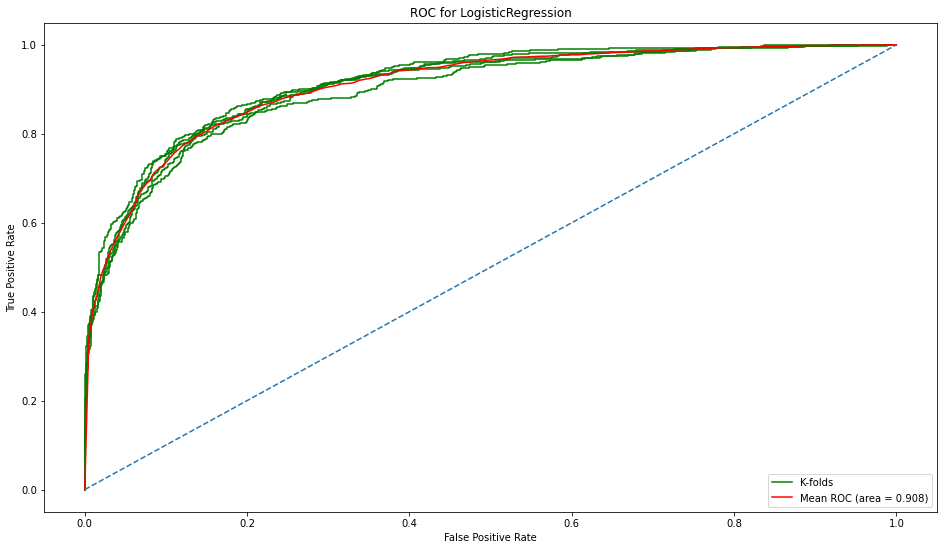

In [244]:
KfoldPlot(X_train,y_train,clf_logreg,5)

## Accuracy metrics- we'll calculate the accuracy on the train set and the validation set

**We can see that we're not over-fitted** we did not over learn the training data

In [245]:
print('score on the train set is :{}'.format(accuracy_score(y_train,clf_logreg.predict(X_train))))
print('score on the validation set is :{}'.format(accuracy_score(y_test, clf_logreg.predict(X_test))))

score on the train set is :0.8779839128178516
score on the validation set is :0.8713359273670558


## A weighted prediction (where false positives are 5 times worse)

In [246]:
Kfold_weighted_accuracy(X_train,y_train,clf_logreg,5)

0.7506588997740063

# We chose to perform the confusion matrix on this model 

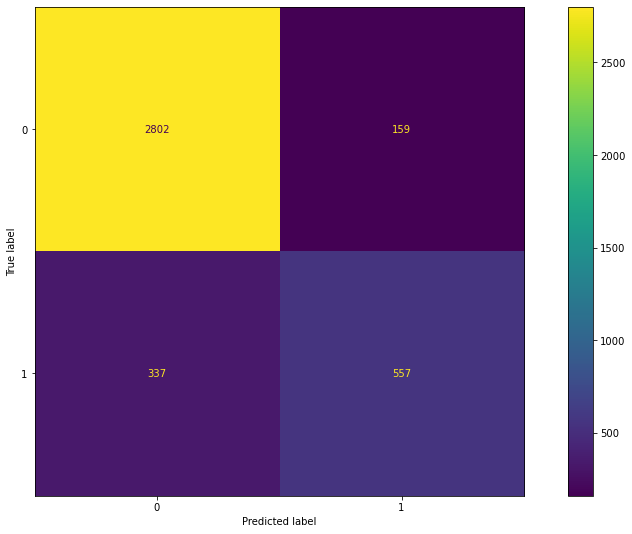

In [247]:
plot_confusion_matrix(clf_logreg,X_test,y_test)

## Explanation

From the confusion matrix, we see the on the given validation set we have got:
* 557 True-Positives- cases where the class 1 was predicted correctly 
* 2802 True-Negatives- cases where the class 0 was predicted correctly 
* 159 Flase-Positives- cases where the class 1 was predicted incorrectly 
* 337 False-Negatives- cases where the class 0 was predicted incorrectly 


## KNN 

In [249]:
parameter_options = {'n_neighbors' : [10,15,23,25],
                    'leaf_size': [15,23,30]}
clf_knn = GridSearchCV(KNeighborsClassifier(n_jobs= -1), parameter_options,cv=5, scoring= 'roc_auc',n_jobs=-1) # n_jobs=-1 tells the classifier to work on all the CPUs

In [250]:
X_train, X_test, y_train, y_test = train_test_split(df_poly.loc[:,df_poly.columns!= 'label'],df_poly.label, test_size=0.2 )
clf_knn.fit(X_train,y_train)
print(clf_knn.best_params_)
print(clf_knn.best_score_)

{'leaf_size': 15, 'n_neighbors': 25}
0.8926801356751215


Initialize the classifier with the best hyperParameters from the grid search **here we specify on the default hyperparameters as well**

In [255]:
clf_knn = KNeighborsClassifier( n_neighbors=25,
    weights='uniform',
    algorithm='auto',
    leaf_size=15,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=-1)

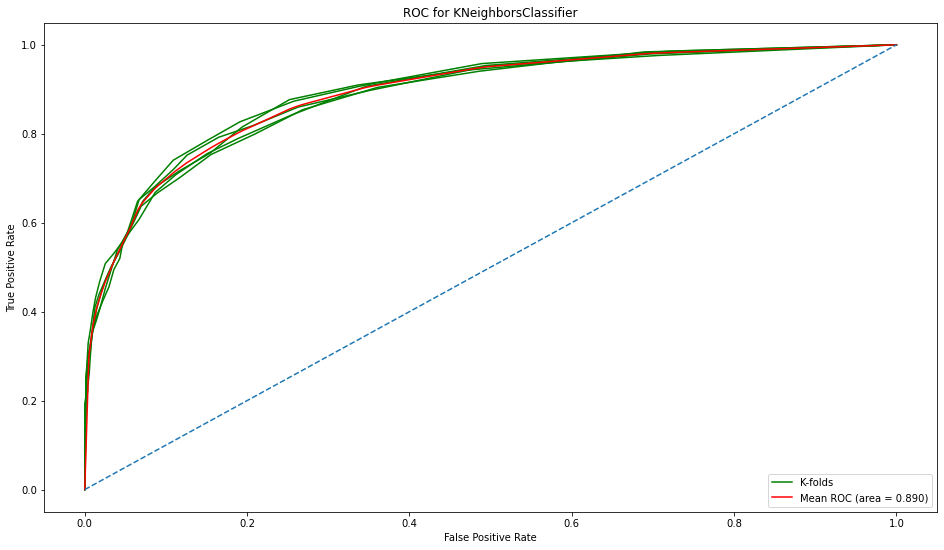

In [256]:
KfoldPlot(X_train,y_train,clf_knn,5)

## Accuracy metrics- we'll calculate the accuracy on the train set and the validation set to compare the performance on both 

In [257]:
print('score on the train set is :{}'.format(accuracy_score(y_train,clf_knn.predict(X_train))))
print('score on the validation set is :{}'.format(accuracy_score(y_test, clf_knn.predict(X_test))))

score on the train set is :0.8640373637778931
score on the validation set is :0.8627756160830091


## A weighted prediction (where false positives are 5 times worse)

In [258]:
Kfold_weighted_accuracy(X_train,y_train,clf_knn,5)

0.793276576574035

# RandomForest

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
parameter_options = {'max_depth' : [14,16,18],
                    'n_estimators': [50,100,150]}
clf_random_forest = GridSearchCV(RandomForestClassifier(n_jobs=-1), parameter_options,cv=5, scoring= 'roc_auc',n_jobs=-1) 

In [263]:
X_train, X_test, y_train, y_test = train_test_split(df_poly.loc[:,df_poly.columns!= 'label'],df_poly.label, test_size=0.2 )
clf_random_forest.fit(X_train,y_train)
print(clf_random_forest.best_params_)
print(clf_random_forest.best_score_)

{'max_depth': 18, 'n_estimators': 150}
0.901860445260437


InInitialize the classifier with the best hyperParameters from the grid search **here we specify on the default hyperparameters as well**

In [264]:
clf_random_forest = RandomForestClassifier(n_estimators=150,
    criterion='gini',
    max_depth=18,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)

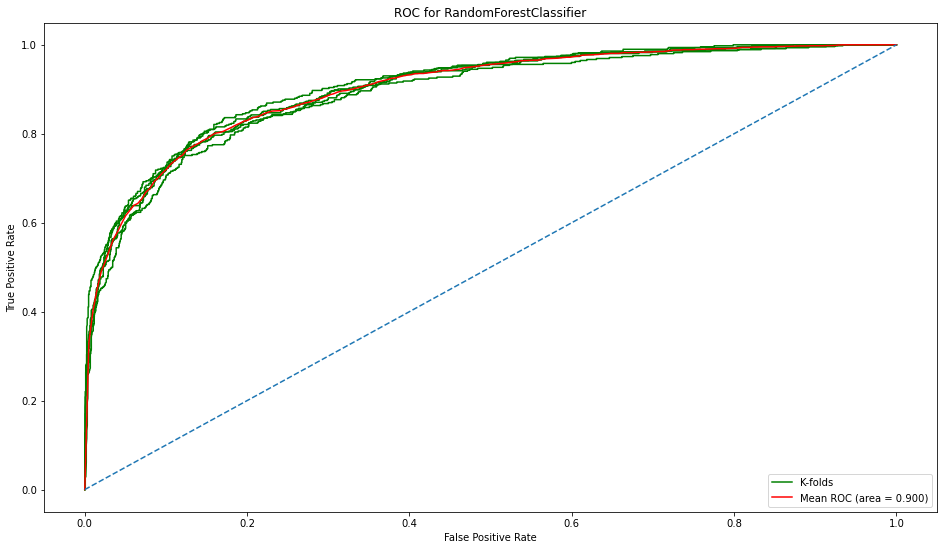

In [265]:
KfoldPlot(X_train,y_train,clf_random_forest,5)

## Accuracy metrics- we'll calculate the accuracy on the train set and the validation set to compare the performance on both 

In [266]:
print('score on the train set is :{}'.format(accuracy_score(y_train,clf_random_forest.predict(X_train))))
print('score on the validation set is :{}'.format(accuracy_score(y_test, clf_random_forest.predict(X_test))))

score on the train set is :0.9326024909185262
score on the validation set is :0.8697795071335928


## A weighted prediction (where false positives are 5 times worse)

In [268]:
Kfold_weighted_accuracy(X_train,y_train,clf_random_forest,5)

0.7776994061667264

# ANN - MLPClassifier

In [269]:
from sklearn.neural_network import MLPClassifier

This grid search takes the longest because of the number of combinations (~ 15 minutes). **we tried a 'relu' activation as well but it performed less good than the logistic so we deleted it to decrease the number of iterations**

In [272]:
parameter_options = {'activation' : ['logistic'],
                    'hidden_layer_sizes' : [(100,), (80,40)],
                    'batch_size': [30,40,60]}
ann_clf = GridSearchCV(MLPClassifier(max_iter=1000), parameter_options,cv=5, scoring= 'roc_auc',n_jobs=-1) 

In [273]:
X_train, X_test, y_train, y_test = train_test_split(df_poly.loc[:,df_poly.columns!= 'label'],df_poly.label, test_size=0.2 )
ann_clf.fit(X_train,y_train)
print(ann_clf.best_params_)
print(ann_clf.best_score_)

{'activation': 'logistic', 'batch_size': 40, 'hidden_layer_sizes': (100,)}
0.8838683499163047


Initialize the classifier with the best hyperParameters from the grid search **here we specify on the default hyperparameters as well**

In [287]:
ann_clf = MLPClassifier(hidden_layer_sizes=(100,),
    activation='logistic',
    solver='sgd',
    alpha=0.1,
    batch_size=40,
    learning_rate='constant',
    learning_rate_init=0.1,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=123,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000)


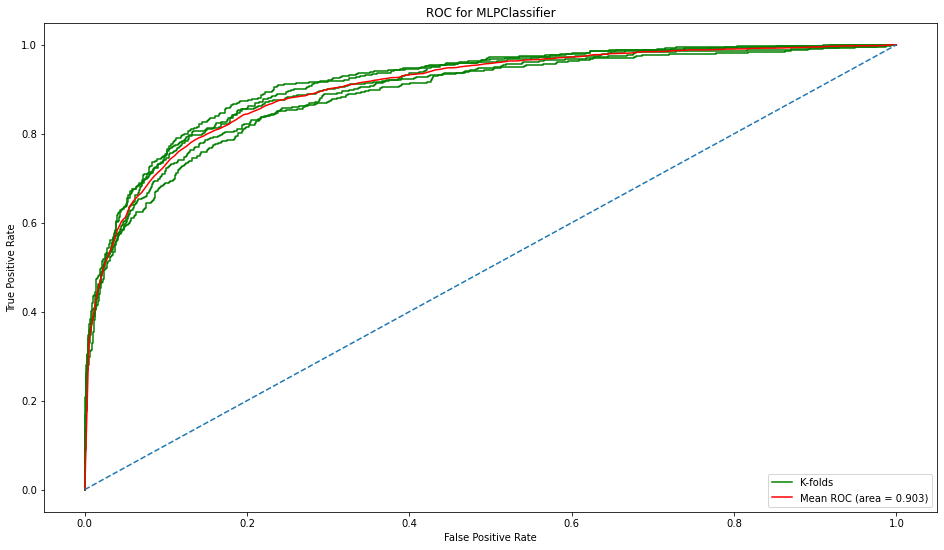

In [288]:
KfoldPlot(X_train,y_train,ann_clf,5)

## Accuracy metrics- we'll calculate the accuracy on the train set and the validation set to compare the performance on both 

In [289]:
print('score on the train set is :{}'.format(accuracy_score(y_train,ann_clf.predict(X_train))))
print('score on the validation set is :{}'.format(accuracy_score(y_test, ann_clf.predict(X_test))))

score on the train set is :0.8713674104826155
score on the validation set is :0.864591439688716


## A weighted prediction (where false positives are 5 times worse)

In [290]:
Kfold_weighted_accuracy(X_train,y_train,ann_clf,5)

0.7804970171515503

# Prediction on test set

## The method 'featurise' will perform all the data proccesing that is needed to perform the prediction on the test set

**We will be performing almost the same data processing steps we did on the training data except the steps where we dropped rows with missing data. we will use imputation on missing data (using the columns averages)**

In [325]:
def featurise(df):
    # Removing the mm from column 14
    for idx, row in df.iterrows():
        df.iloc[idx,14] = row[14][:-2]
    
    # let's convert this column to floats
    df['14'] = df['14'].astype(float)
    #Let' remove the 'unkwown' values and replace them with nan
    df.loc[df['13']=='unknown','13'] = np.nan
    # now let's convert it to floats
    df['13'] = df['13'].astype(float)
    
    # we can clearly see in the plot that the number of mean should be 2 
    k_means = KMeans(2)
    k_means.fit(df.loc[:,'10'].to_numpy().reshape(-1,1))
    k_means.cluster_centers_
    
    df['10_binary'] = k_means.predict(df.loc[:,'10'].to_numpy().reshape(-1,1))
    #we want to keep the label column last (just for our conveniece)
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    
    # After running some tests, we discovered that dropping feature 10 gives better results ('10_binary holds enough information and highly correlated with feature '10)
    df = df.drop(columns=['10'])
    
    # we aren't dropping features '11'/'12' since we got better results by leaving both of them
    df = df.drop(columns=['1'])
    df = df.drop(columns=['17'])
    df = df.drop(columns=['0'])
    df = df.drop(columns=['16'])
    
    # We will perform one hot encoding for the categorical features
    one_hot = pd.get_dummies(df['5'])
    df = df.join(one_hot.add_suffix('_F5'))
    one_hot = pd.get_dummies(df['6'])
    df = df.join(one_hot.add_suffix('_F6'))
    one_hot = pd.get_dummies(df['18'])
    df = df.join(one_hot.add_suffix('_F18'))
    one_hot = pd.get_dummies(df['19'])
    df = df.join(one_hot.add_suffix('_F19'))
    one_hot = pd.get_dummies(df['22'])
    df = df.join(one_hot)
    one_hot = pd.get_dummies(df['9'])
    df = df.join(one_hot.add_suffix('_Month'))
    df = df.drop(columns=['5','6','18','19','22','9'])
    
    df['15'] = df['15'].fillna(df['15'].mean())
    
    df['20'] = df['20'].fillna(df['20'].mean())
    # scaling
    list_of_columns = list(df.columns[:15])
    scaler = StandardScaler()
    features_to_scale= df[list_of_columns]
    scaler.fit(features_to_scale)
    features_to_scale=pd.DataFrame(scaler.transform(features_to_scale),index=df.index)
#     features_to_scale = features_to_scale.dropna()
    rest_of_cols = df[df.columns[15:]]
    df = features_to_scale.join(rest_of_cols)
    df = df.fillna(df.mean())

    #adding polynomial features
    poly = PolynomialFeatures(degree=2)
    df_poly = poly.fit_transform(df[df.columns[:15]])
    
    df_poly = pd.DataFrame(df_poly,index=df.index)
    df_poly = df_poly.add_suffix('_poly')
    
    df_poly = df_poly.join(df[df.columns[15:]])
    return df_poly

In [326]:
df_test = pd.read_csv('test_without_target.csv')

In [327]:
df_test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0,1.534361,12.002415,2.6,67.0,97.0,F,a11,1.600000,0.650000,3,0.212177,1022.1,1026.2,0,0.2mm,105.0,21.5,12.2,F,H,52.0,33.0,2012,70.0,354.720533
1,1,1.632953,14.821694,3.6,72.0,78.0,M,a18,1.942857,1.328571,4,0.126069,1013.2,1016.3,0,0.2mm,34.0,25.0,24.3,P,D,24.0,11.0,2012,40.0,120.529466
2,2,2.330694,21.399766,5.4,64.0,53.0,A,a20,1.864286,0.992857,8,0.263743,1017.2,1020.7,0,0.0mm,102.0,23.7,22.8,C,O,39.0,31.0,2011,70.0,294.533370
3,3,2.560304,21.744331,5.8,20.0,71.0,N,a18,2.457143,1.257143,11,0.182740,1007.0,1011.4,1,16.6mm,124.0,33.7,26.0,N,I,35.0,13.0,2012,60.0,57.037532
4,4,1.391859,18.158369,4.8,44.0,42.0,F,a3,1.285714,0.892857,9,0.241681,1020.7,1023.5,0,0.0mm,84.0,16.1,15.4,M,M,43.0,20.0,2012,200.0,178.457573


In [328]:
# we will clean the column 'Unnamed:0'
df_test = df_test.drop(columns=['Unnamed: 0'])
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.534361,12.002415,2.6,67.0,97.0,F,a11,1.600000,0.650000,3,0.212177,1022.1,1026.2,0,0.2mm,105.0,21.5,12.2,F,H,52.0,33.0,2012,70.0,354.720533
1,1.632953,14.821694,3.6,72.0,78.0,M,a18,1.942857,1.328571,4,0.126069,1013.2,1016.3,0,0.2mm,34.0,25.0,24.3,P,D,24.0,11.0,2012,40.0,120.529466
2,2.330694,21.399766,5.4,64.0,53.0,A,a20,1.864286,0.992857,8,0.263743,1017.2,1020.7,0,0.0mm,102.0,23.7,22.8,C,O,39.0,31.0,2011,70.0,294.533370
3,2.560304,21.744331,5.8,20.0,71.0,N,a18,2.457143,1.257143,11,0.182740,1007.0,1011.4,1,16.6mm,124.0,33.7,26.0,N,I,35.0,13.0,2012,60.0,57.037532
4,1.391859,18.158369,4.8,44.0,42.0,F,a3,1.285714,0.892857,9,0.241681,1020.7,1023.5,0,0.0mm,84.0,16.1,15.4,M,M,43.0,20.0,2012,200.0,178.457573


In [329]:
df_featurised = featurise(df_test)

In [330]:
pd.DataFrame.to_csv(pd.DataFrame(clf_logreg.predict_proba(df_featurised)[:,1]),'29.csv')